## Scikit-Learn

### Linear Regression

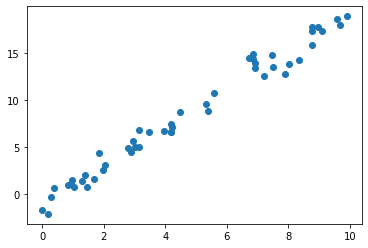

In [279]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data 
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.plot(x,y,'o')

In [280]:
# 1 모델 클래스 선택
from sklearn.linear_model import LinearRegression

In [281]:
# 2 모델 초모수 선택 (=모델의 옵션)
model = LinearRegression(fit_intercept=True)

In [282]:
# 3 데이터를 특징 행렬과 대상 벡터로 배치
X = x[:, np.newaxis]
X.shape

(50, 1)

In [283]:
# 4 모델을 데이터에 접합
model.fit(X,y)

LinearRegression()

In [284]:
model.coef_

array([2.02720881])

In [285]:
model.intercept_ ## 절편

-0.9985770855532063

$$ y = 2.02720881*x - 0.9985770855532063$$

In [286]:
# 5 새로운 데이터로 레이블 예측
xfit = np.linspace(-1,11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

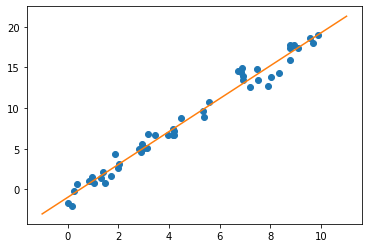

In [287]:
plt.plot(x,y, 'o')
plt.plot(xfit,yfit)

### Multiple Regression

#### Sample Data

In [288]:
import pandas as pd

url = 'https://gist.githubusercontent.com/jalaliamin/ff2fca9c2a808deae53270c186c2d39e/raw/b8aaae884d87c61441cfc4a32f5ca601c861e1c0/imports-85.csv'
ds = pd.read_csv(url)
ds.head

<bound method NDFrame.head of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd        

In [289]:
auto = ds[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [290]:
auto = auto.replace('?', np.nan).dropna()
auto.shape

(199, 4)

In [291]:
auto.dtypes

price          object
horsepower     object
width         float64
height        float64
dtype: object

In [292]:
auto['price'] = pd.to_numeric(auto.price)
auto['horsepower'] = pd.to_numeric(auto.horsepower)

In [293]:
auto.dtypes

price           int64
horsepower      int64
width         float64
height        float64
dtype: object

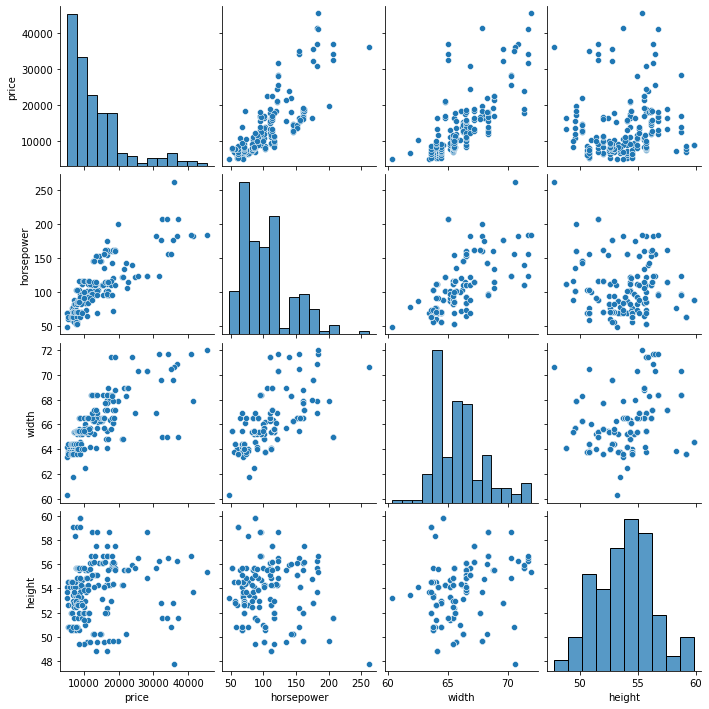

In [294]:
import seaborn as sns
sns.pairplot(auto)

#### Model

In [295]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [296]:
model = LinearRegression()

X = auto.drop('price', axis=1)
y = auto['price']

model.fit(X,y)

print('결정계수: {:.3f}'.format(model.score(X,y)))
print('\n회귀계수:\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('\n절편: {:.3f}'.format(model.intercept_))

결정계수: 0.766

회귀계수:
horsepower     125.438864
width         1391.185230
height         237.295876
dtype: float64

절편: -104142.001


$$y=-104142.001+125.438864*x_1 + 1391.185230*x_2 + 237.295876*x_3$$

In [297]:
print('hoserpower : {0}~{1}'.format(X.horsepower.min(), X.horsepower.max()))
print('width : {0}~{1}'.format(X.width.min(), X.width.max()))
print('height : {0}~{1}'.format(X.height.min(), X.height.max()))

hoserpower : 48~262
width : 60.3~72.0
height : 47.8~59.8


In [298]:
#print(X.iloc[0,:])
unknown = [[111, 64.1, 48.8]]
pred = model.predict(unknown)
print('예측값 = {0}, y = {1}, y-pred = {2}'.format(pred, y[0], y[0] - pred))

예측값 = [10536.72474438], y = 13495, y-pred = [2958.27525562]


In [299]:
unknown = [[111, 64.1, 48.8],
           [112, 65, 50]]
pred = model.predict(np.array(unknown))
pred

array([10536.72474438, 12198.9853665 ])

#### Regression Results 확인하기

In [300]:
# https://www.statsmodels.org/stable/install.html
import statsmodels.api as sm

X_ = sm.add_constant(X) # Add a column of ones to an array.
res = sm.OLS(y,X_).fit() # Ordinary Least Squares
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 31 May 2021   Prob (F-statistic):           3.28e-61
Time:                        12:38:03   Log-Likelihood:                -1925.3
No. Observations:                 199   AIC:                             3859.
Df Residuals:                     195   BIC:                             3872.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.041e+05   1.05e+04     -9.919      0.0

### 로지스틱 회귀

In [301]:
iris = pd.read_csv('iris.csv')
iris.head

<bound method NDFrame.head of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [302]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [303]:
from sklearn.linear_model import LogisticRegression

X = iris.drop(['Species'], axis=1)
y = iris.Species

model = LogisticRegression(max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [304]:
unknown = [[5.1, 3.5, 1.4, 0.2]]
model.predict(unknown)

array(['setosa'], dtype=object)

In [305]:
pred = model.predict(X)
pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica'

In [306]:
np.mean(pred == y)

0.9733333333333334

In [307]:
print('정확도: {:.3f}'.format(model.score(X,y)))

정확도: 0.973


#### Regression Results 확인하기

In [308]:
y_ = y.map({"setosa":0,"versicolor":1,"virginica":2})

In [309]:
import statsmodels.api as sm

X_ = sm.add_constant(X) # Add a column of ones to an array.
res = sm.GLM(y_,X_).fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Species   No. Observations:                  150
Model:                            GLM   Df Residuals:                      145
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                        0.048004
Method:                          IRLS   Log-Likelihood:                 17.437
Date:                Mon, 31 May 2021   Deviance:                       6.9606
Time:                        12:47:11   Pearson chi2:                     6.96
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1865      0.205      0.910   

$$Species = 0.1865 -0.1119*Sepal.Length -0.0401*Sepal.Width + 0.2286*Petal.Length + 0.6093*Petal.Width$$

In [310]:
unknown = [[5.1, 3.5, 1.4, 0.2]]
model.predict(np.array(unknown))

array(['setosa'], dtype=object)